<a href="https://colab.research.google.com/github/Yorrek/SchlemmerSlammer/blob/master/Finding_Dinner_for_'Nerds'001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vorarbeiten
0. auf den Reiter files
1.  mkdir input
2.   rechtsklick
3. dateien hochladen





Food that tastes good, makes me fat. I don't want to get fat(ter). So even though a steady diet of Taco Bell is tempting, probably won't help me accomplish my 'be less fat' goal.

So as an alternative to Taco Bell, I want to find low calorie recipes that 1) taste good & 2) have relatively high amounts of protein.

Most people would just search for healthy recipes, but it's more fun to use a data set like this.

Disclaimer: As it will become painfully clear, I'm definitely not a nutritionist. Please forgive the use of low calorie as an (incorrect) proxy for 'healthy' and any other nutrition-based errors.

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [0]:
#load data
#df1 = pd.read_csv('../input/epi_r.csv')
df1 = pd.read_csv('input/epi_r.csv')



In [8]:
#quick look at data
df1.head(2)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


680 is a lot of columns, looks like a majority are ingredient types. Let's assume that I don't care about ingredients, only basic nutritional info & quick/simple metrics

In [9]:
#narrowing dataset & looking at summary stats
recipes = df1.iloc[:,:10]
recipes.drop(['#cakeweek','#wasteless'], axis=1, inplace=True)

recipes.describe()

,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000848,0.001346
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.029105,0.036671
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000


Few observations
* Lots of 4.375 ratings, could be issue with data, let's assume there isn't a problem.
* Definitely need to pull outliers from 'calories' column (should handle the high values for 'protein' - 'sodium'
* Will need to fill missing values

In [10]:
#checking nan values in each column
for i in recipes.columns:
    print(i, sum(recipes[i].isnull()))

title 0
rating 0
calories 4117
protein 4162
fat 4183
sodium 4119
22-minute meals 0
3-ingredient recipes 0


In [0]:
#filling nan values with pseudo-average & removing outliers ---- may not be best method, alternative is to drop nan rows
cal_clean = recipes.loc[recipes['calories'].notnull()]

q1  = cal_clean['calories'].quantile(.25)
q3  = cal_clean['calories'].quantile(.75)
iqr = q3 - q1

for i in recipes.columns[1:6]:
    recipes[i].fillna(cal_clean.loc[(cal_clean['calories'] > q1) & (recipes['calories'] < q3)][i].mean(), inplace=True)
    
recipes = recipes.loc[(recipes['calories'] > q1-(iqr*3)) & (recipes['calories'] < q3+(iqr*3))]

In [12]:
#check summary stats after cleaning data
recipes.describe()

,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes
count,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000
mean,3.709651,402.378215,16.820585,22.087230,603.389204,0.000816,0.001377
std,1.343762,282.300829,21.729452,20.273537,2443.852586,0.028553,0.037081
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,226.000000,4.000000,10.000000,118.000000,0.000000,0.000000
50%,4.375000,353.444934,13.167150,18.369012,448.000000,0.000000,0.000000
75%,4.375000,481.000000,17.000000,26.000000,528.000000,0.000000,0.000000
max,5.000000,1743.000000,253.000000,166.000000,132220.000000,1.000000,1.000000


After cleaning up the data & removing outliers; this looks much better

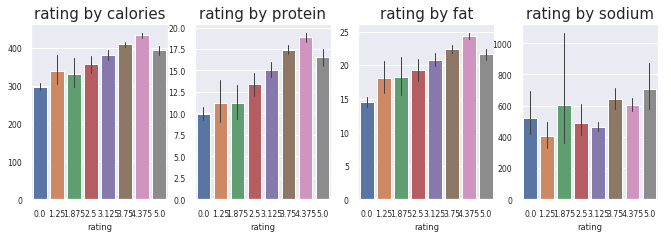

In [13]:
#plotting health metrics against recipe rating
dict_plt = {0:'calories',1:'protein',2:'fat',3:'sodium'}

sns.set(font_scale=.7)

fig, ax = plt.subplots(1,4, figsize=(10,3))

for i in range(4):
    sns.barplot(x='rating',y=dict_plt[i], data=recipes, ax=ax[i], errwidth=1)
    ax[i].set_title('rating by {}'.format(dict_plt[i]), size=15)
    ax[i].set_ylabel('')

Who would have guessed? Higher rated recipes have more calories & more fat! This genious discovery has uncovered the source of all obesity problems, people like 'bad' food! Again this was discovered by me & not a previously known, obvious fact.

Interestingly, the 5-star ratings see a decrease in both. Maybe I can find a few recipes that taste good without getting fat(ter). I'm looking for recipes with low calorie count but with decent amount of protein.


Note: Totally realize that low calorie doesn't mean healthy, just using the 2,000 - 2,500 daily calorie intake rule as a proxy for 'healthy.'

In [14]:
five_star = recipes.loc[recipes['rating'] == 5]

print('We have {:,} 5-star recipes to choose from'.format(len(recipes.loc[recipes['rating'] == 5])))

We have 2,652 5-star recipes to choose from


In [0]:
a = pd.qcut(five_star['calories'], [0,.33,.66,1], labels=['low cal','med cal', 'high cal']).rename('cal_bin')

five_star = five_star.join(a)

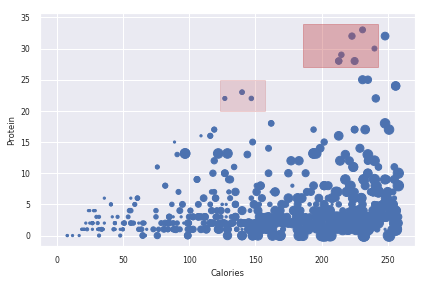

In [16]:
low_cal = five_star.loc[five_star['cal_bin'] == 'low cal']

plt.scatter(x='calories', y='protein', s=low_cal['fat']*5, data=low_cal)

plt.xlabel('Calories')
plt.ylabel('Protein')
plt.axhspan(ymin=20, ymax=25, xmin=.48, xmax=.6, alpha=.2, color='r')
plt.axhspan(ymin=27, ymax=34, xmin=.7, xmax=.9, alpha=.4, color='r')

In [17]:
#light red box from chart above
low_cal.loc[(low_cal['protein'] > 20) & (low_cal['calories'] < 160)]

,title,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes,cal_bin
6056,Giblet Stock,5.0,127.0,22.0,3.0,95.0,0.0,0.0,low cal
7850,Turkey Stock,5.0,140.0,23.0,4.0,103.0,0.0,0.0,low cal
13422,Giblet Stock,5.0,127.0,22.0,3.0,95.0,0.0,0.0,low cal
14199,Turkey Stock,5.0,140.0,23.0,4.0,103.0,0.0,0.0,low cal
14518,"Salted Roast Turkey with Orange, Fall Spices, ...",5.0,147.0,22.0,4.0,763.0,0.0,0.0,low cal


In [18]:
#dark red box from chart above
low_cal.loc[low_cal['protein'] > 27]

,title,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes,cal_bin
260,My Favorite Roast Turkey,5.0,225.0,28.0,10.0,2397.0,0.0,0.0,low cal
4128,Pan-Cooked Bass with Dill and Cucumber,5.0,248.0,32.0,12.0,409.0,0.0,0.0,low cal
4858,Korean-Style Tuna Tartare,5.0,213.0,28.0,8.0,83.0,0.0,0.0,low cal
9014,Steamed Scrod Fillets Chinese Style,5.0,223.0,32.0,8.0,679.0,0.0,0.0,low cal
10188,Sea Scallops with Spiced Bacon,5.0,215.0,29.0,6.0,970.0,0.0,0.0,low cal
13969,Shrimp Courtbouillon with Rice,5.0,240.0,30.0,5.0,965.0,0.0,0.0,low cal
14865,Korean-Style Tuna Tartare,5.0,213.0,28.0,8.0,83.0,0.0,0.0,low cal
15897,Mahimahi with Brown-Sugar Soy Glaze,5.0,231.0,33.0,7.0,995.0,0.0,0.0,low cal


With the two tables above, I've found some alternatives to Taco Bell. Reading through, not all are options (i.e Turkey Stock) but there are some options.

Now I have a list of recipes that I can look up the recipes on http://www.epicurious.com/recipes-menus 

And if all of these options fail, Taco Bell is only a 5-minute drive away.

Note: Going through this data, it's clear that there are some abnormalities. Like duplicate entries (Giblet or Turkey Stock) or abnormally high values (sodium in Roast Turkey). Instead of trying to prune/clean further, I'll just trust the 'eye-test' when looking at actual recipes.